- 시각화 프로젝트
    - 출연자와 감독의 영향력에 따른 분석 => 추이
      -> 특정 배우와 감독의 출연이 특정 콘텐츠 인기도에 어떤 영향을 끼치는지, 가장 영향력이 있는 배우와 감독이 누군지 ?
    - 국가별 가입비에 따른 가입자 수

1) 출연자와 감독의 영향력에 따른 분석

In [68]:
# [1] 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
# [2] Data 준비
file1 = r"C:\Hwan\Pandas_ex\시각화 project\titles.csv"
file2 = r"C:\Hwan\Pandas_ex\시각화 project\credits.csv"

In [70]:
# 테이블 합치기 
titleDF = pd.read_csv(file1)
creditDF = pd.read_csv(file2)

In [71]:
# 확인
print(titleDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

imdb_score : imdb의 평점  
imdb_votes : imdb의 투표율 
tmdb_popularity : tmdb의 인지도
tmdb_score : tmdb의 평점

### 영화 및 TV 프로그램에 대한 정보와 평가를 제공하는 DB
- IMDb (Internet Movie Database) : 전 세계 사용자가 매긴 평점의 평균
- TMDb (The Movie Database) : 커뮤니티 기반의 개방형 플랫폼, 커뮤니티 사용자가 매긴 평점의 평균

In [72]:
print(creditDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB
None


In [73]:
# 결측치 확인
titleDF.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [74]:
# 중복값 확인
titleDF.duplicated().sum()

0

In [75]:
# 상관관계 분석
titleDF.corr(numeric_only = True)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.173551,-0.504407,-0.129380,-0.208815,0.043244,0.032073
runtime,-0.173551,1.000000,-0.139642,-0.148068,0.139760,0.002545,-0.277454
seasons,-0.504407,-0.139642,1.000000,0.106806,0.206079,0.168051,0.044023
imdb_score,-0.129380,-0.148068,0.106806,1.000000,0.190661,0.017675,0.570754
imdb_votes,-0.208815,0.139760,0.206079,0.190661,1.000000,0.209763,0.112960
tmdb_popularity,0.043244,0.002545,0.168051,0.017675,0.209763,1.000000,0.071894
tmdb_score,0.032073,-0.277454,0.044023,0.570754,0.112960,0.071894,1.000000


#### 미비하긴하나 imdb_score와 tmdb_score의 관계가 제일 높다

In [76]:
# 필요없는 칼럼 제거
titleDF.columns
titleDF.drop(["description", "release_year", "age_certification", "runtime", "seasons", "imdb_id", "type", "genres"], axis = 1, inplace = True)

In [77]:
titleDF.describe()

,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,6.510861,2.343938e+04,22.637925,6.829175
std,1.163826,9.582047e+04,81.680263,1.170391
min,1.500000,5.000000e+00,0.009442,0.500000
25%,5.800000,5.167500e+02,2.728500,6.100000
50%,6.600000,2.233500e+03,6.821000,6.900000
75%,7.300000,9.494000e+03,16.590000,7.537500
max,9.600000,2.294231e+06,2274.044000,10.000000


In [78]:
titleDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   production_countries  5850 non-null   object 
 3   imdb_score            5368 non-null   float64
 4   imdb_votes            5352 non-null   float64
 5   tmdb_popularity       5759 non-null   float64
 6   tmdb_score            5539 non-null   float64
dtypes: float64(4), object(3)
memory usage: 320.0+ KB


##### 평균치 vs 이상치
- 평균값 : 이상치에 매우 민감, 데이터에 극단적인 값이 있으면 평균이 그 값에 영향을 크게 받음 -> 전체 데이터 왜곡 가능성 ↑
- 중앙값 : 데이터의 중간값이므로, 이상치의 영향을 받음 => 주관적인 평가가 포함된 데이터에서 사용 

##### imdb_score, mdb_votes, tmdb_popularity, tmdb_score 평가 데이터, 투표 데이터, 인기도 데이터, 평점 데이터 모두 주관적
==> 이상치의 영향을 받을 가능성 ↑
==> 결측치를 모두 중앙값으로 대체

In [79]:
# 결측치 => 중앙값으로 채우기
titleDF['imdb_score'].fillna(titleDF['imdb_score'].median(), inplace=True)
titleDF['imdb_votes'].fillna(titleDF['imdb_votes'].median(), inplace=True)
titleDF['tmdb_popularity'].fillna(titleDF['tmdb_popularity'].median(), inplace=True)
titleDF['tmdb_score'].fillna(titleDF['tmdb_score'].median(), inplace=True)

C:\Users\hwans\AppData\Local\Temp\ipykernel_28248\3623337720.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titleDF['imdb_score'].fillna(titleDF['imdb_score'].median(), inplace=True)
C:\Users\hwans\AppData\Local\Temp\ipykernel_28248\3623337720.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [80]:
titleDF.isna().sum()

id                      0
title                   1
production_countries    0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [81]:
# title 칼럼 결측치 찾은 후 제거
titleDF[titleDF['title'].isna()]
titleDF = titleDF.drop(index = 1704)

In [82]:
titleDF.isna().sum()

id                      0
title                   0
production_countries    0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [83]:
# credit 파일 결측치 확인 후 제거
creditDF.info()
creditDF.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


person_id       0
id              0
name            0
character    9772
role            0
dtype: int64

In [84]:
# 중복값 확인 및 제거
creditDF.duplicated().sum()

0

In [85]:
# 상관관계 분석
creditDF.corr(numeric_only= True)

,person_id
person_id,1.0


In [86]:
# 필요없는 칼럼 제거
creditDF = creditDF.drop(["character"], axis = 1)

In [87]:
creditDF

,person_id,id,name,role
0,3748,tm84618,Robert De Niro,ACTOR
1,14658,tm84618,Jodie Foster,ACTOR
2,7064,tm84618,Albert Brooks,ACTOR
3,3739,tm84618,Harvey Keitel,ACTOR
4,48933,tm84618,Cybill Shepherd,ACTOR
...,...,...,...,...
77796,736339,tm1059008,Adelaida Buscato,ACTOR
77797,399499,tm1059008,Luz Stella Luengas,ACTOR
77798,373198,tm1059008,Inés Prieto,ACTOR
77799,378132,tm1059008,Isabel Gaona,ACTOR


In [88]:
# 2개의 DataFrame 합치기
TotlaDF = pd.merge(creditDF, titleDF, left_on = "id", right_on = "id")
TotlaDF

,person_id,id,name,role,title,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,3748,tm84618,Robert De Niro,ACTOR,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
1,14658,tm84618,Jodie Foster,ACTOR,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
2,7064,tm84618,Albert Brooks,ACTOR,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
3,3739,tm84618,Harvey Keitel,ACTOR,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
4,48933,tm84618,Cybill Shepherd,ACTOR,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
...,...,...,...,...,...,...,...,...,...,...
77795,736339,tm1059008,Adelaida Buscato,ACTOR,Lokillo,['CO'],3.8,68.0,26.005,6.300
77796,399499,tm1059008,Luz Stella Luengas,ACTOR,Lokillo,['CO'],3.8,68.0,26.005,6.300
77797,373198,tm1059008,Inés Prieto,ACTOR,Lokillo,['CO'],3.8,68.0,26.005,6.300
77798,378132,tm1059008,Isabel Gaona,ACTOR,Lokillo,['CO'],3.8,68.0,26.005,6.300


In [89]:
TotlaDF.describe()

,person_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,7.780000e+04,77800.000000,7.780000e+04,77800.000000,77800.000000
mean,5.294952e+05,6.471085,6.187727e+04,30.132354,6.715878
std,6.430183e+05,1.088712,1.878949e+05,88.650851,1.024595
min,7.000000e+00,1.500000,5.000000e+00,0.600000,1.000000
25%,4.530600e+04,5.800000,1.580000e+03,5.053000,6.100000
50%,1.983590e+05,6.600000,5.579000e+03,11.466000,6.800000
75%,8.880965e+05,7.200000,3.574800e+04,25.230000,7.400000
max,2.462818e+06,9.500000,2.294231e+06,2274.044000,10.000000


- [분석]

In [90]:
# 출연배우별 참여한 콘텐츠의 수와 인기도 분석
# 주요 배우가 참여한 콘텐츠 수와 인기도 분석
TotlaDF = TotlaDF.set_index(["name", "role"])
TotlaDF

,,person_id,id,title,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
name,role,,,,,,,,
Robert De Niro,ACTOR,3748,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
Jodie Foster,ACTOR,14658,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
Albert Brooks,ACTOR,7064,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
Harvey Keitel,ACTOR,3739,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
Cybill Shepherd,ACTOR,48933,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
...,...,...,...,...,...,...,...,...,...
Adelaida Buscato,ACTOR,736339,tm1059008,Lokillo,['CO'],3.8,68.0,26.005,6.300
Luz Stella Luengas,ACTOR,399499,tm1059008,Lokillo,['CO'],3.8,68.0,26.005,6.300
Inés Prieto,ACTOR,373198,tm1059008,Lokillo,['CO'],3.8,68.0,26.005,6.300


In [1]:
## imdb_score을 사용하고 tmdb_score 대신 tmdb_popularity을 사용한 이유 
# -> tmdb_popularity 지표는 실시간 트랜드를 반영하기 때문에 현재 인기 있는 콘텐츠를 분석하기 유용 (tmdb_score은 변하지 않지만, 인기도는 변함)

In [91]:
actor = TotlaDF.xs("ACTOR", level=1)
actor

,person_id,id,title,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
name,,,,,,,,
Robert De Niro,3748,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
Jodie Foster,14658,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
Albert Brooks,7064,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
Harvey Keitel,3739,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
Cybill Shepherd,48933,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
...,...,...,...,...,...,...,...,...
Aída Morales,368473,tm1059008,Lokillo,['CO'],3.8,68.0,26.005,6.300
Adelaida Buscato,736339,tm1059008,Lokillo,['CO'],3.8,68.0,26.005,6.300
Luz Stella Luengas,399499,tm1059008,Lokillo,['CO'],3.8,68.0,26.005,6.300


- TMDB, IMDB에서 각 작품의 평점이 다르므로, 대표적인 지표를 확인하고자 평점의 평균을 구함 => 이상치 완화


In [92]:
# 배우가 참여한 콘텐츠 수
actorcnt = actor.groupby('name').size()

# 배우별 TMDB 인기 점수 평균
actor_tmdb_popularity = actor.groupby('name')['tmdb_popularity'].mean()

# 배우별 IMDb 평점 평균
actor_imdb_score = actor.groupby('name')['imdb_score'].mean()
print(actor_tmdb_popularity, actor_imdb_score, sep = "\n\n\n")

name
 Michael Hayden         6.159
'Jeeva' Ravi            2.540
'Weird Al' Yankovic    10.963
21 Savage              12.640
2Mex                    1.859
                        ...  
陈慧恬                     0.846
陳怡嘉                     3.995
马兰                     14.258
麥沛東                     4.779
정지환                    50.095
Name: tmdb_popularity, Length: 51308, dtype: float64


name
 Michael Hayden        6.9
'Jeeva' Ravi           7.6
'Weird Al' Yankovic    6.5
21 Savage              4.3
2Mex                   6.3
                      ... 
陈慧恬                    6.6
陳怡嘉                    6.8
马兰                     6.6
麥沛東                    6.7
정지환                    8.6
Name: imdb_score, Length: 51308, dtype: float64


In [132]:
print("tmdb_popularity의 감독/배우별 평균 점수와 일반 데이터", titleDF['tmdb_popularity'].describe(), actor.groupby('name')['tmdb_popularity'].mean().describe(), sep = "\n\n\n\n")

## std가 감소 분석에 그나마 용이하다고 판단

tmdb_popularity의 감독/배우별 평균 점수와 일반 데이터



count    5849.000000
mean       22.394546
std        81.072685
min         0.009442
25%         2.765000
50%         6.821000
75%        16.244000
max      2274.044000
Name: tmdb_popularity, dtype: float64



count    51308.000000
mean        30.510533
std         79.431174
min          0.600000
25%          5.962750
50%         12.817000
75%         27.741000
max       2274.044000
Name: tmdb_popularity, dtype: float64


In [133]:
print("imdb_score의 감독/배우별 평균 점수와 일반 데이터", titleDF['imdb_score'].describe(), actor.groupby('name')['imdb_score'].mean().describe(), sep = "\n\n\n\n")

## std가 감소 분석에 그나마 용이하다고 판단

imdb_score의 감독/배우별 평균 점수와 일반 데이터



count    5849.000000
mean        6.518191
std         1.115206
min         1.500000
25%         5.900000
50%         6.600000
75%         7.300000
max         9.600000
Name: imdb_score, dtype: float64



count    51308.000000
mean         6.461041
std          1.023661
min          1.500000
25%          5.900000
50%          6.600000
75%          7.200000
max          9.500000
Name: imdb_score, dtype: float64


In [93]:
# 감독추출
director = TotlaDF.xs("DIRECTOR", level=1)
director

,person_id,id,title,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
name,,,,,,,,
Martin Scorsese,3308,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
John Boorman,17727,tm154986,Deliverance,['US'],7.7,107673.0,10.010,7.300
Terry Jones,11475,tm127384,Monty Python and the Holy Grail,['GB'],8.2,534486.0,15.461,7.811
Terry Gilliam,11473,tm127384,Monty Python and the Holy Grail,['GB'],8.2,534486.0,15.461,7.811
Robert Aldrich,1063,tm120801,The Dirty Dozen,"['GB', 'US']",7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...
Joe Penney,1785287,tm1216735,Sun of the Soil,[],6.6,2233.5,1.179,7.000
Barry Gonzalez,753271,tm985215,Princess 'Daya'Reese,['PH'],7.1,50.0,1.383,6.900
Mohamed Bakir,1827884,tm1097142,My Bride,['EG'],5.0,327.0,2.545,5.300


In [94]:
# 감독이 참여한 콘텐츠 수
directorcnt = director.groupby('name').size()

# 감독별 TMDB 인기 점수 평균
director_tmdb_popularity = director.groupby('name')['tmdb_popularity'].mean()

# 감독별 IMDb 평점 평균
director_imdb_score = director.groupby('name')['imdb_score'].mean()

print(director_tmdb_popularity, director_imdb_score, sep = "\n\n\n")

name
A. L. Vijay          2.144667
A. Salaam            0.620000
A.R. Murugadoss      3.954500
Aakash Bhatia      286.682000
Aamir Khan          17.660000
                      ...    
오승열                 11.801000
장성                   0.641000
주둥닝                 29.769000
지뢰                   8.369000
탕빈                  42.708000
Name: tmdb_popularity, Length: 3443, dtype: float64


name
A. L. Vijay        6.20
A. Salaam          4.60
A.R. Murugadoss    6.65
Aakash Bhatia      5.20
Aamir Khan         8.30
                   ... 
오승열                7.70
장성                 6.60
주둥닝                8.00
지뢰                 7.30
탕빈                 8.00
Name: imdb_score, Length: 3443, dtype: float64


In [95]:
TotlaDF

,,person_id,id,title,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
name,role,,,,,,,,
Robert De Niro,ACTOR,3748,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
Jodie Foster,ACTOR,14658,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
Albert Brooks,ACTOR,7064,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
Harvey Keitel,ACTOR,3739,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
Cybill Shepherd,ACTOR,48933,tm84618,Taxi Driver,['US'],8.2,808582.0,40.965,8.179
...,...,...,...,...,...,...,...,...,...
Adelaida Buscato,ACTOR,736339,tm1059008,Lokillo,['CO'],3.8,68.0,26.005,6.300
Luz Stella Luengas,ACTOR,399499,tm1059008,Lokillo,['CO'],3.8,68.0,26.005,6.300
Inés Prieto,ACTOR,373198,tm1059008,Lokillo,['CO'],3.8,68.0,26.005,6.300


In [96]:
# Top 10명 배우 
TenAcor_tmdb = actor_tmdb_popularity.sort_values(ascending=False).head(10)
TenAcor_tmdb

TenAcor_imdb = actor_imdb_score.sort_values(ascending=False).head(10)
TenAcor_imdb

print(TenAcor_tmdb, TenAcor_imdb, sep = "\n\n\n")

name
Sean Lin                2274.044
RQ                      2274.044
Queenie Chen            2274.044
Sin-Ting Huang          2274.044
Hsuan-yen Tsai          2274.044
Charlie Heaton          2226.231
Jamie Campbell Bower    2226.231
Priah Ferguson          2226.231
Zaris-Angel Hator       1723.363
Paul Chowdhry           1723.363
Name: tmdb_popularity, dtype: float64


name
Anna Gunn         9.5
Cricket Leigh     9.3
Jessie Flower     9.3
Zach Tyler        9.3
Ryu Jun-yeol      9.2
Kim Seol          9.2
Lee Hye-ri        9.2
Yui Okada         9.1
Phil Jackson      9.1
Scottie Pippen    9.1
Name: imdb_score, dtype: float64


In [97]:
# Top 10명 감독
Tendirector_tmdb = director_tmdb_popularity.sort_values(ascending=False).head(10)
Tendirector_tmdb

Tendirector_imdb = director_imdb_score.sort_values(ascending=False).head(10)
Tendirector_imdb

print(Tendirector_tmdb, Tendirector_imdb, sep = "\n\n\n")

name
Chris Williams         1723.3630
Alberto de Toro        1668.2960
Patrick Hughes         1439.9060
Fabien Martorell       1194.1490
Kevin Ko               1138.6155
Joseph Kosinski         996.8690
Javier Ruiz Caldera     839.6245
Michael Lewen           564.0040
Martina Pastori         561.7220
Tetsuro Araki           550.6430
Name: tmdb_popularity, dtype: float64


name
Jason Hehir            9.10
Sashi Kiran Tikka      9.10
Hiroshi Koujina        9.00
Bruno Stagnaro         9.00
Alastair Fothergill    8.90
Jonathan Hughes        8.90
Keith Scholey          8.90
Shin Won-ho            8.85
Steve Cheng            8.80
Robert Zemeckis        8.80
Name: imdb_score, dtype: float64


In [98]:
# 한글폰트 설정 => 폰트 매니저 모듈
from matplotlib import font_manager as fm 
from matplotlib import rc 

# 적용할 폰트 파일
FONT_FILE = r'C:\Windows\Fonts\Hancom Gothic Regular.ttf'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


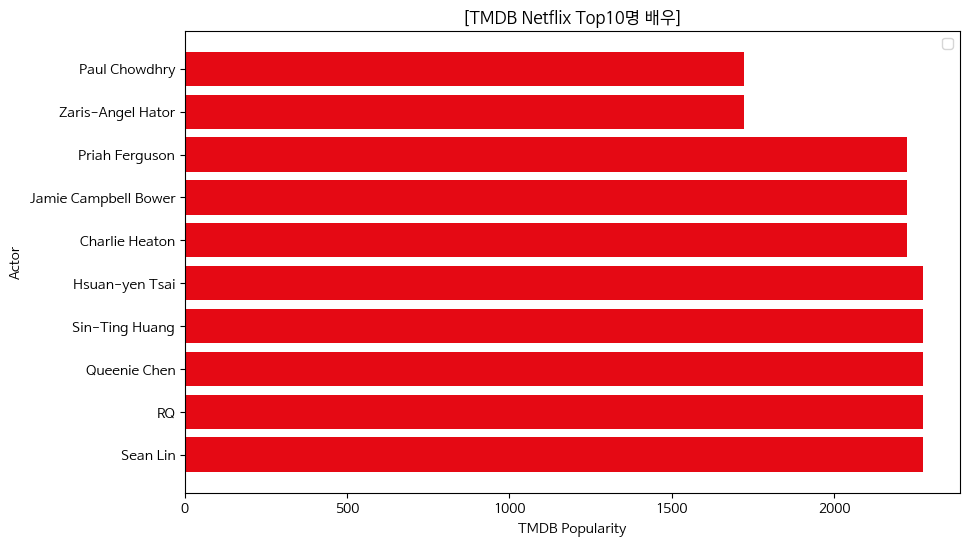

In [123]:
# 10명의 배우 및 감독 막대그래프 함수
def Tenbarh_func(data, title, x_label, y_label) :
    plt.figure(figsize=(10, 6))
    plt.barh(data.index, data.values, color="#E50914")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

Tenbarh_func(TenAcor_tmdb, "[TMDB Netflix Top10명 배우]", 'TMDB Popularity', 'Actor')

In [124]:
# TMDB Popularity의 max 값이 2274 => max를 가지는 4명의 배우가 존재

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


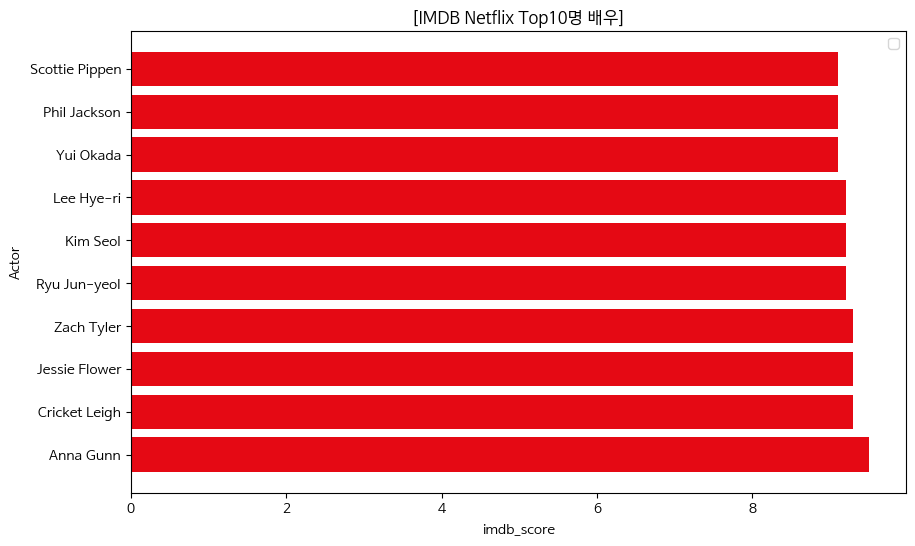

In [100]:
Tenbarh_func(TenAcor_imdb, "[IMDB Netflix Top10명 배우]", 'imdb_score', 'Actor')

In [125]:
# IMDB의 MAX 값이 9.5인데 1등인 배우 : 9.1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


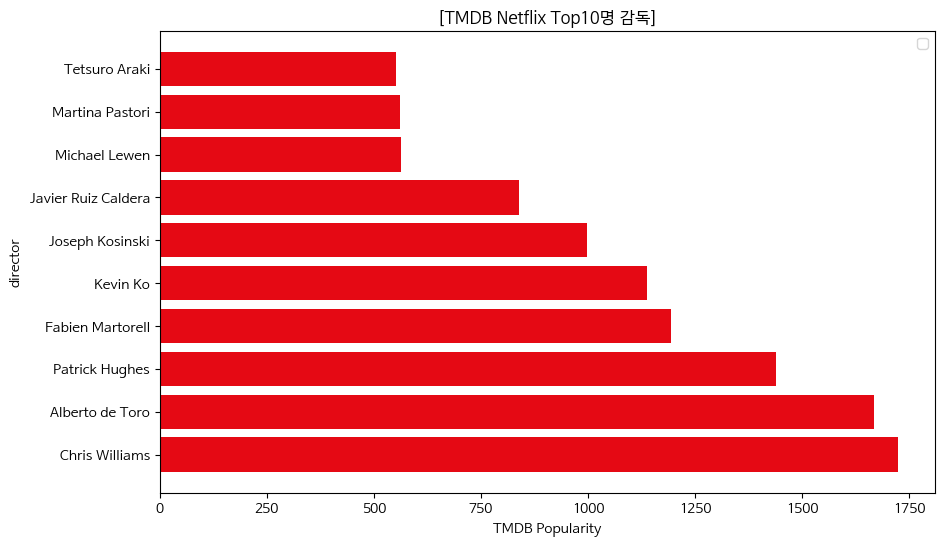

In [101]:
Tenbarh_func(Tendirector_tmdb, "[TMDB Netflix Top10명 감독]", 'TMDB Popularity', 'director')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


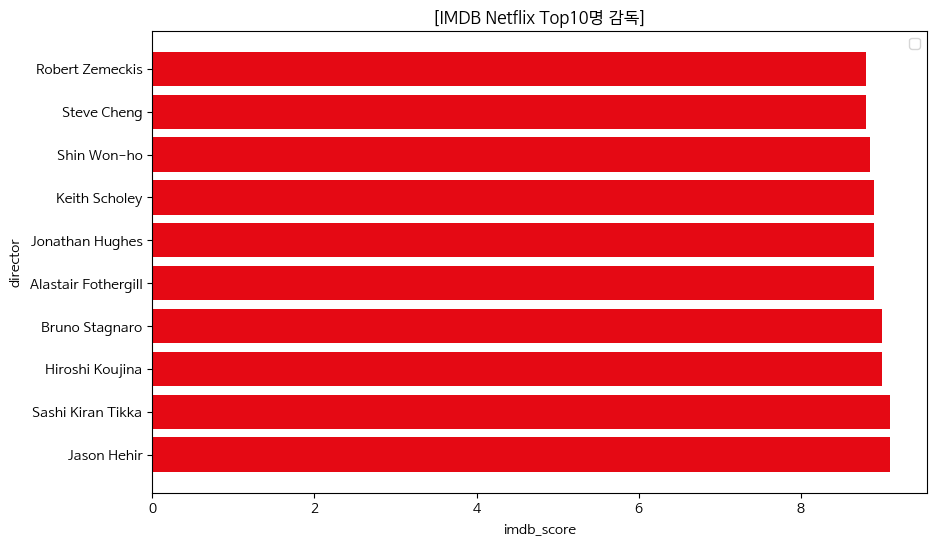

In [102]:
Tenbarh_func(Tendirector_imdb, "[IMDB Netflix Top10명 감독]", 'imdb_score', 'director')

### 국가별 넷플릭스 구독료에 따른 가입자의 수

In [103]:
file3 = r"C:\Hwan\Pandas_ex\시각화 project\netflix price in different countries.csv"

In [104]:
feeDF = pd.read_csv(file3)
feeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        65 non-null     object 
 1   Total Library Size             65 non-null     int64  
 2   No. of TV Shows                65 non-null     int64  
 3   No. of Movies                  65 non-null     int64  
 4   Cost Per Month - Basic ($)     65 non-null     float64
 5   Cost Per Month - Standard ($)  65 non-null     float64
 6   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ KB


In [105]:
# 결측치 확인
feeDF.isna().sum()

Country                          0
Total Library Size               0
No. of TV Shows                  0
No. of Movies                    0
Cost Per Month - Basic ($)       0
Cost Per Month - Standard ($)    0
Cost Per Month - Premium ($)     0
dtype: int64

In [106]:
# 중복값 확인
feeDF.duplicated().sum()
feeDF

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74
...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32
61,Switzerland,5506,3654,1852,12.88,20.46,26.96
62,Australia,6114,4050,2064,7.84,12.12,16.39
63,Denmark,4558,2978,1580,12.00,15.04,19.60


In [107]:
# 나라별 중복데이터 없음 
feeDF["Country"].duplicated().sum()

0

In [108]:
# 불필요 칼럼 삭제
feeDF = feeDF.drop(["No. of TV Shows", "No. of Movies"], axis = 1)

In [109]:
# 상관관계분석 
feeDF.corr(numeric_only = True)

corrFE = feeDF.corr(numeric_only = True)["Cost Per Month - Standard ($)"]
round(corrFE["Cost Per Month - Premium ($)"], 2)

feeDF.corr(numeric_only = True)

,Total Library Size,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Total Library Size,1.000000,-0.062877,-0.055200,-0.071521
Cost Per Month - Basic ($),-0.062877,1.000000,0.898535,0.820914
Cost Per Month - Standard ($),-0.055200,0.898535,1.000000,0.978768
Cost Per Month - Premium ($),-0.071521,0.820914,0.978768,1.000000


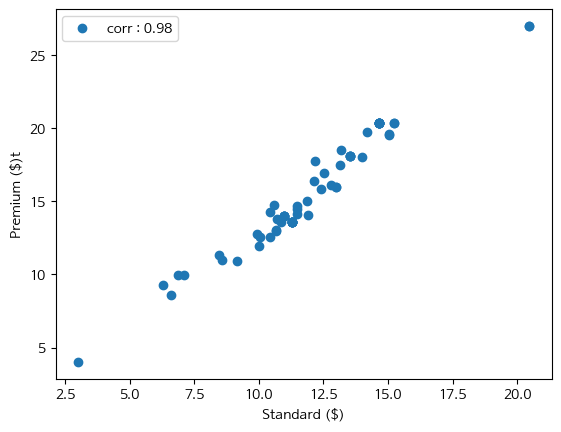

In [110]:
# 산점도 그래프 시각화
plt.scatter(feeDF["Cost Per Month - Standard ($)"], feeDF["Cost Per Month - Premium ($)"], 
            label = f"corr : {round(corrFE['Cost Per Month - Premium ($)'], 2)}")
plt.xlabel("Standard ($)")
plt.ylabel("Premium ($)t")
plt.legend()
plt.show()

In [111]:
feeDF.columns = ["Country", "Content", "Basic", "Standard", "Premium"]
feeDF

,Country,Content,Basic,Standard,Premium
0,Argentina,4760,3.74,6.30,9.26
1,Austria,5640,9.03,14.67,20.32
2,Bolivia,4991,7.99,10.99,13.99
3,Bulgaria,6797,9.03,11.29,13.54
4,Chile,4994,7.07,9.91,12.74
...,...,...,...,...,...
60,Ireland,6486,9.03,14.67,20.32
61,Switzerland,5506,12.88,20.46,26.96
62,Australia,6114,7.84,12.12,16.39
63,Denmark,4558,12.00,15.04,19.60


In [112]:
# 나라를 행 인덱스로
feeDF = feeDF.set_index("Country")

In [113]:
feeDF

,Content,Basic,Standard,Premium
Country,,,,
Argentina,4760,3.74,6.30,9.26
Austria,5640,9.03,14.67,20.32
Bolivia,4991,7.99,10.99,13.99
Bulgaria,6797,9.03,11.29,13.54
Chile,4994,7.07,9.91,12.74
...,...,...,...,...
Ireland,6486,9.03,14.67,20.32
Switzerland,5506,12.88,20.46,26.96
Australia,6114,7.84,12.12,16.39


In [114]:
# 요금별 내림차순 정렬
feeDFBAsic = feeDF["Basic"].sort_values(ascending=False)
feeDFStandard = feeDF["Standard"].sort_values(ascending=False)
feeDFPremium = feeDF["Premium"].sort_values(ascending=False)

In [115]:
TenBasic = feeDFBAsic.head(10)
TenBasic

Country
Switzerland      12.88
Liechtenstein    12.88
Denmark          12.00
Sweden           10.90
Israel           10.56
Belgium          10.16
France           10.16
Norway            9.94
Taiwan            9.74
Singapore         9.51
Name: Basic, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


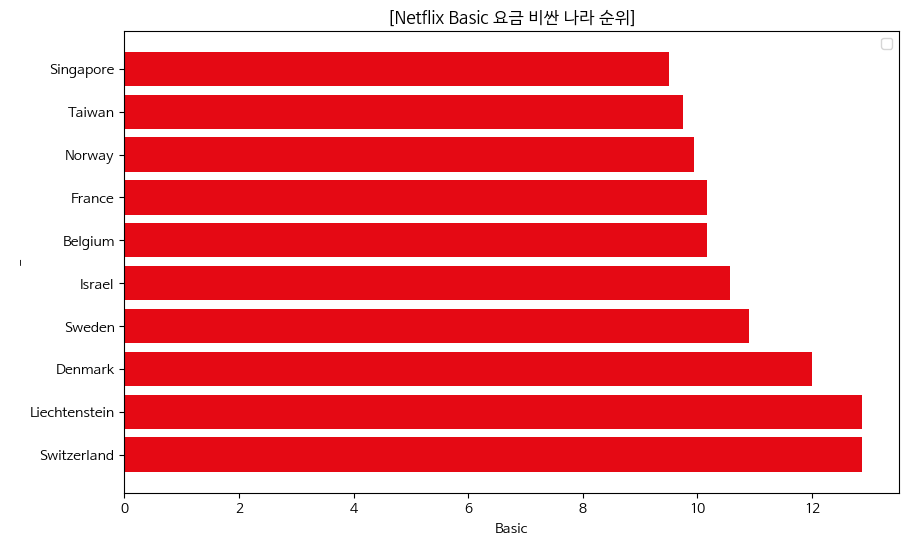

In [116]:
Tenbarh_func(TenBasic, "[Netflix Basic 요금 비싼 나라 순위]", 'Basic', '_')

#### 베이직 단계 순위
1) 스위스, 리히엔슈타인 => 2024.07.24 기준 한화 만 칠천원
2) 덴마크 => 만 육천 육백원
3) 스웨덴 => 만 오천원

In [117]:
TenStand = feeDFStandard.head(10)
TenStand

Country
Switzerland      20.46
Liechtenstein    20.46
Belgium          15.24
France           15.24
Israel           15.05
Denmark          15.04
Iceland          14.67
Italy            14.67
San Marino       14.67
Austria          14.67
Name: Standard, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


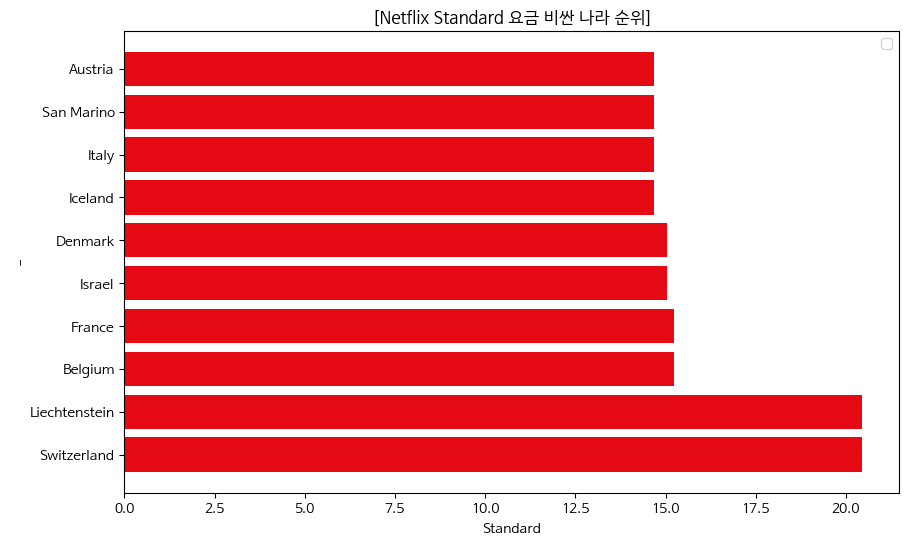

In [118]:
Tenbarh_func(TenStand, "[Netflix Standard 요금 비싼 나라 순위]", 'Standard', '_')

#### 스탠다드 단계 순위
1) 스위스, 리히엔슈타인 => 2024.07.24 기준 한화 28,300
2) 벨기에, 프랑스 => 약 21,000
3) 이스라엘 => 약 20,800

In [119]:
TenPremi = feeDFPremium.head(10)
TenPremi

Country
Liechtenstein    26.96
Switzerland      26.96
Iceland          20.32
Austria          20.32
Italy            20.32
Gibraltar        20.32
Germany          20.32
France           20.32
San Marino       20.32
Spain            20.32
Name: Premium, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


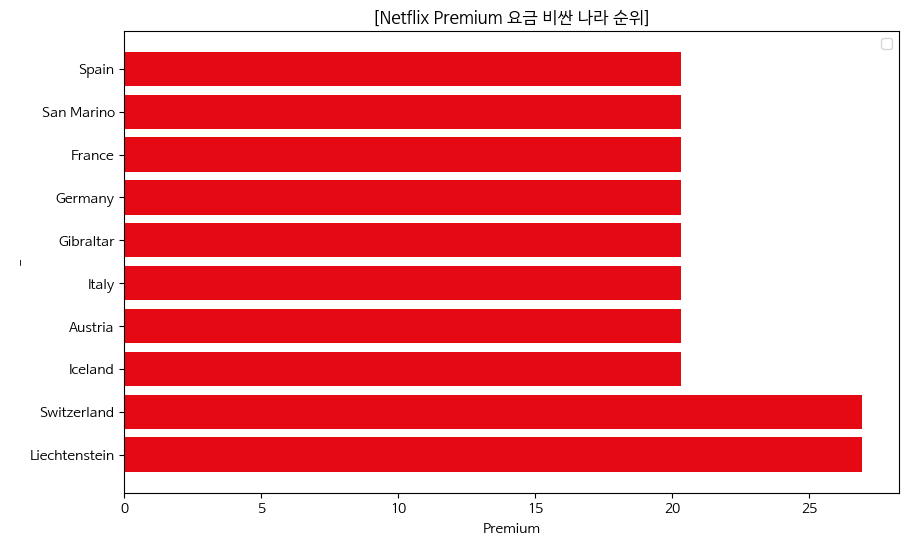

In [120]:
Tenbarh_func(TenPremi, "[Netflix Premium 요금 비싼 나라 순위]", 'Premium', '_')

#### 프리미엄 단계 순위
1) 스위스, 리히엔슈타인 => 2024.07.24 기준 한화 37,300
2) 아이슬랜드, 오스트리아, 이탈리아, 독일, 프랑스 등 => 약 28,000

In [121]:
# 한국 가격
feeDF.loc["South Korea"] # ==> 싼 편 

Content     5195.00
Basic          8.07
Standard      11.47
Premium       14.45
Name: South Korea, dtype: float64

### 아쉬운 점


#### top10 배우 및 감독이 출연한 작품이 제조된 국가 데이터를 함께 뽑아 구독료가 비싼 top10 국가들과 비교를 하고 싶었으나, name과 role(actor or director)을 먼저 뽑았기에 그 이후에 다시 나라를 뽑는 것이 실력적 한계를 느낌